### EDA de encuesta de perfiles ->

In [103]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json


columnas = ['fecha', 'mail', 'edad', 'genero', 'municipio', 'estado_civil', 'pregunta_1', 'pregunta_2', 'pregunta_3', 'pregunta_4', 'pregunta_5',
            'pregunta_6', 'pregunta_7', 'pregunta_8', 'pregunta_9', 'pregunta_10', 'pregunta_11', 'pregunta_12', 'pregunta_13', 'pregunta_14',
            'pregunta_15', 'pregunta_16', 'pregunta_17', 'pregunta_18', 'pregunta_19', 'pregunta_20', 'pregunta_21' , 'pregunta_22']


dataset = pd.read_csv('CuestionarioCompleto.csv', sep=',' , encoding='utf-8', names=columnas , header=0)
dataset.head()


,fecha,mail,edad,genero,municipio,estado_civil,pregunta_1,pregunta_2,pregunta_3,pregunta_4,...,pregunta_13,pregunta_14,pregunta_15,pregunta_16,pregunta_17,pregunta_18,pregunta_19,pregunta_20,pregunta_21,pregunta_22
0,19/7/2023 21:35:40,mahuitzic65@gmail.com,20,Femenino Cisgénero,Cuauhtémoc,Soltero,"Visitar un museo o galería de arte., Visitar u...","Leer, Ver películas o series de televisión, Es...",Una vez a la semana,3,...,"Cocina mexicana, Cocina china",Lacto-vegetariana,"Basketball, Box","Arte: Pintura, escultura, fotografía, arte mod...",No tengo preferencia,No tengo preferencia,No,Fines de semana temprano,3.0,NaN
1,19/7/2023 21:36:00,aguilarvaleria004@gmail.com,22,Femenino Cisgénero,Iztapalapa,Soltero,"Ver películas en un cine., Visitar una feria l...","Hacer ejercicio o practicar deportes, Viajar, ...",Una vez a la semana,4,...,"Cocina mexicana, Cocina italiana, Cocina japonesa",Estándar,"Basketball, Atletismo, Natación, Voleibol","Música: Conciertos, festivales, géneros musica...",No tengo preferencia,Citas casuales,Tal vez,"Entre semana en la noche, Fines de semana por ...",3.0,NaN
2,19/7/2023 21:37:49,aguilarbjimena@gmail.com,21,Femenino Cisgénero,Iztapalapa,Soltero,"Ver películas en un cine., Ir a cenar a un res...","Ver películas o series de televisión, Pintar o...",Una vez a la semana,5,...,"Cocina mexicana, Cocina estadounidense, Cocina...",Pescetariana,"Basketball, Natación","Música: Conciertos, festivales, géneros musica...",Aire libre,Citas casuales,Sí,Entre semana temprano,4.0,NaN
3,19/7/2023 22:16:32,dcr26mer@gmail.com,20,Femenino Cisgénero,Gustavo A. Madero,Soltero,"Ver películas en un cine., Pasear por un parqu...","Leer, Cocinar, Ver películas o series de telev...",Una vez a la semana,5,...,"Cocina mexicana, Cocina estadounidense, Cocina...",Estándar,Atletismo,"Música: Conciertos, festivales, géneros musica...",No tengo preferencia,No tengo preferencia,Sí,"Entre semana por la tarde, Fines de semana por...",3.0,NaN
4,19/7/2023 23:05:28,cdenisse618@gmail.com,20,Femenino Cisgénero,Tlalnepantla de Baz,En una relación,Hacer una caminata o senderismo en la naturale...,"Cocinar, Jugar videojuegos, Ver películas o se...",Una vez a la semana,3,...,"Cocina mexicana, Cocina china",Estándar,"Basketball, Box, Natación, Voleibol",Ninguno,No tengo preferencia,Citas casuales,No,Cualquier día temprano,4.0,NaN


In [105]:
dataset['pregunta_16'][0]

'Arte: Pintura, escultura, fotografía, arte moderno, arte clásico, etc., Literatura: Novelas, poesía, ensayos, autores clásicos y contemporáneos, etc., Historia: Civilizaciones antiguas, periodos históricos, eventos históricos, etc., Arquitectura: Estilos arquitectónicos, edificios emblemáticos, diseño urbano, etc., Patrimonio cultural: Sitios y monumentos considerados Patrimonio de la Humanidad, museos, preservación del patrimonio cultural, etc.'

In [106]:
import pandas as pd

# Función para procesar las respuestas con múltiples categorías
def procesar_respuestas(respuesta):
    categorias = []
    in_parentesis = False
    temp_categoria = ""

    for char in respuesta:
        if char == '(':
            in_parentesis = True
        elif char == ')':
            in_parentesis = False
        elif char == ',' and not in_parentesis:
            categorias.append(temp_categoria.strip())
            temp_categoria = ""
        else:
            temp_categoria += char

    categorias.append(temp_categoria.strip())

    return categorias

data = pd.read_csv("CuestionarioCompleto.csv", sep=",", encoding='utf-8')

# Crear una tabla de equivalencias vacía
tabla_equivalencias = {}

# Recorrer cada columna categórica y asignar valores numéricos a cada categoría individual
for column in data.columns:
    if column.startswith("¿") and data[column].dtype == 'object':
        unique_categories = set()
        for row in data[column]:
            if isinstance(row, str) and ',' in row:
                categorias = procesar_respuestas(row)
            elif isinstance(row, str):
                categorias = [row.strip()]
            else:
                # Manejar otros casos, como valores numéricos o NaN
                categorias = [str(row)]
            unique_categories.update(categorias)

        tabla_equivalencias[column] = dict(zip(unique_categories, range(1, len(unique_categories) + 1)))

        # Reemplazar las categorías por los valores numéricos en el DataFrame
        data[column] = data[column].apply(lambda row: [tabla_equivalencias[column][cat] for cat in procesar_respuestas(row)] if isinstance(row, str) and ',' in row else [tabla_equivalencias[column][str(row).strip()]])

# Mostrar el DataFrame procesado
print(data)


         Marca temporal    Dirección de correo electrónico  ¿Cuál es tu edad?  \
0    19/7/2023 21:35:40              mahuitzic65@gmail.com                 20   
1    19/7/2023 21:36:00        aguilarvaleria004@gmail.com                 22   
2    19/7/2023 21:37:49           aguilarbjimena@gmail.com                 21   
3    19/7/2023 22:16:32                 dcr26mer@gmail.com                 20   
4    19/7/2023 23:05:28              cdenisse618@gmail.com                 20   
..                  ...                                ...                ...   
107   3/10/2023 6:30:31            andiclaus2009@gmail.com                 21   
108   3/10/2023 6:52:51          mafersantos1902@gmail.com                 22   
109   3/10/2023 7:10:53                  gabrc84@gmail.com                 21   
110  3/10/2023 11:56:12              requiem2552@gmail.com                 23   
111  3/10/2023 18:01:24  viverosmartinezfernanda@gmail.com                 21   

    ¿Con que género te iden

In [107]:
# Ruta de la carpeta donde se guardarán los diccionarios
carpeta_diccionarios = "diccionarios"

# Crear la carpeta si no existe
if not os.path.exists(carpeta_diccionarios):
    os.makedirs(carpeta_diccionarios)

# Exportar los diccionarios a archivos separados en la carpeta
for nombre_columna, diccionario in tabla_equivalencias.items():
    nombre_archivo = f"{nombre_columna}.json"
    ruta_archivo = os.path.join(carpeta_diccionarios, nombre_archivo)

    with open(ruta_archivo, 'w', encoding='utf-8') as archivo:
        archivo.write(json.dumps(diccionario, indent=4, ensure_ascii=False))

print("Diccionarios exportados exitosamente a la carpeta 'diccionarios'.")


Diccionarios exportados exitosamente a la carpeta 'diccionarios'.


In [108]:
data.head(3)

,Marca temporal,Dirección de correo electrónico,¿Cuál es tu edad?,¿Con que género te identificas?,¿En dónde vives?,Estado civil,"¿Cuáles son tus actividades favoritas para citas? (individuales, pareja o en grupo)",¿Cuáles son tus hobbies o pasatiempos?,¿Con qué frecuencia te gusta(ría) tener citas?,¿Qué importancia le das a la organización y eficiencia en la planificación de citas?,...,¿Cuál es tu tipo de cocina preferida?,¿Tienes alguna restricción alimentaria o preferencia dietética?,¿Cuáles son tus deportes favoritos?,¿Tienes algún interés cultural en particular?,¿Prefieres actividades al aire libre o en interiores?,"¿Prefieres citas casuales o más formales? (Una cita casual es más relajada, informal y sin reglas estrictas de etiqueta , Una cita formal tiene un enfoque más elegante y tradicional)",¿Tienes expectativas de vestimenta para la cita?,¿Cuál es tu disponibilidad de días y horarios para citas?,¿Qué nivel de flexibilidad tienes en la programación de citas?,@
0,19/7/2023 21:35:40,mahuitzic65@gmail.com,20,[5],[6],Soltero,"[14, 16, 28, 10, 7]","[11, 21, 10, 30, 29]",[2],3,...,"[5, 10]",[2],"[5, 17]","[29, 32, 25, 46, 34, 2, 45, 14, 24, 5, 2, 31, ...",[2],[3],[2],[5],3.0,NaN
1,19/7/2023 21:36:00,aguilarvaleria004@gmail.com,22,[5],[8],Soltero,"[13, 5, 12, 28, 17]","[5, 22, 13, 16, 8]",[2],4,...,"[5, 4, 1]",[1],"[5, 7, 20, 11]","[57, 9, 23, 52, 2, 29, 32, 25, 46, 34, 2, 27, 38]",[2],[2],[3],"[10, 4, 8]",3.0,NaN
2,19/7/2023 21:37:49,aguilarbjimena@gmail.com,21,[5],[8],Soltero,"[13, 30, 27, 26, 24]","[21, 23, 1, 22, 4]",[2],5,...,"[5, 7, 10]",[4],"[5, 20]","[57, 9, 23, 52, 2, 53, 28, 47, 13, 2, 51, 12, ...",[1],[2],[1],[7],4.0,NaN


In [109]:
#cambiar estado civil por numeros
data['Estado civil'] = data['Estado civil'].replace(['Soltero'], 1)
data['Estado civil'] = data['Estado civil'].replace(['En una relación'], 2)
data['Estado civil'] = data['Estado civil'].replace(['Casado'], 3)


In [110]:
#clonar data en df 
df = data.copy()

In [111]:
print((df.columns))

Index(['Marca temporal', 'Dirección de correo electrónico',
       '¿Cuál es tu edad?', '¿Con que género te identificas?',
       '¿En dónde vives?', 'Estado civil',
       '¿Cuáles son tus actividades favoritas para citas? (individuales, pareja o en grupo)',
       '¿Cuáles son tus hobbies o pasatiempos?',
       '¿Con qué frecuencia te gusta(ría) tener citas?',
       '¿Qué importancia le das a la organización y eficiencia en la planificación de citas?',
       '¿Qué nivel de flexibilidad tienes en las fechas y horarios de las citas?',
       '¿Cuál es tu preferencia   de inicio de las citas? ',
       '¿Cuál es el rango de distancia aceptable para las citas? (Entiéndase por distancia el punto de encuentro de inicio de la cita, puede ser desde tu casa, casa de tu pareja o punto medio)',
       '¿Cuál es tu rango de presupuesto para una cita cualquiera?',
       '¿Cuál es tu rango de presupuesto para una cita especial?',
       '¿Prefieres citas cortas, largas o extendidas?',
       '

In [112]:
# Supongamos que tu DataFrame se llama df
nuevos_nombres = ['MarcaTemporal', 'CorreoElectronico', 'Edad', 'Genero', 'Ubicacion', 'EstadoCivil', 'ActividadesCitas', 'Hobbies', 'FrecuenciaCitas',
 'Organizacion', 'FlexibilidadHoraria', 'InicioCitas', 'DistanciaAceptable', 'PresupuestoGeneral', 'PresupuestoEspecial',
 'DuracionCitas', 'ImportanciaClima',    'ActividadesClima', 'Cocina', 'RestriccionesAlimentarias', 'Deportes',
 'InteresesCulturales', 'EntornoCitas', 'FormalidadCitas', 'Vestimenta', 'Disponibilidad', 'FlexibilidadHoraria' , '@']


# Cambia los nombres de las columnas
df.columns = nuevos_nombres


In [113]:
df.head(3)

,MarcaTemporal,CorreoElectronico,Edad,Genero,Ubicacion,EstadoCivil,ActividadesCitas,Hobbies,FrecuenciaCitas,Organizacion,...,Cocina,RestriccionesAlimentarias,Deportes,InteresesCulturales,EntornoCitas,FormalidadCitas,Vestimenta,Disponibilidad,FlexibilidadHoraria,@
0,19/7/2023 21:35:40,mahuitzic65@gmail.com,20,[5],[6],1,"[14, 16, 28, 10, 7]","[11, 21, 10, 30, 29]",[2],3,...,"[5, 10]",[2],"[5, 17]","[29, 32, 25, 46, 34, 2, 45, 14, 24, 5, 2, 31, ...",[2],[3],[2],[5],3.0,NaN
1,19/7/2023 21:36:00,aguilarvaleria004@gmail.com,22,[5],[8],1,"[13, 5, 12, 28, 17]","[5, 22, 13, 16, 8]",[2],4,...,"[5, 4, 1]",[1],"[5, 7, 20, 11]","[57, 9, 23, 52, 2, 29, 32, 25, 46, 34, 2, 27, 38]",[2],[2],[3],"[10, 4, 8]",3.0,NaN
2,19/7/2023 21:37:49,aguilarbjimena@gmail.com,21,[5],[8],1,"[13, 30, 27, 26, 24]","[21, 23, 1, 22, 4]",[2],5,...,"[5, 7, 10]",[4],"[5, 20]","[57, 9, 23, 52, 2, 53, 28, 47, 13, 2, 51, 12, ...",[1],[2],[1],[7],4.0,NaN


In [114]:
print(df.iloc[2])


MarcaTemporal                                               19/7/2023 21:37:49
CorreoElectronico                                     aguilarbjimena@gmail.com
Edad                                                                        21
Genero                                                                     [5]
Ubicacion                                                                  [8]
EstadoCivil                                                                  1
ActividadesCitas                                          [13, 30, 27, 26, 24]
Hobbies                                                     [21, 23, 1, 22, 4]
FrecuenciaCitas                                                            [2]
Organizacion                                                                 5
FlexibilidadHoraria                                                          4
InicioCitas                                                                [2]
DistanciaAceptable                                  

In [115]:
#buscar los valores nulos en df
df.isnull().sum()


MarcaTemporal                  0
CorreoElectronico              0
Edad                           0
Genero                         0
Ubicacion                      0
EstadoCivil                    0
ActividadesCitas               0
Hobbies                        0
FrecuenciaCitas                0
Organizacion                   0
FlexibilidadHoraria            0
InicioCitas                    0
DistanciaAceptable             0
PresupuestoGeneral             0
PresupuestoEspecial            0
DuracionCitas                  0
ImportanciaClima               0
ActividadesClima               0
Cocina                         0
RestriccionesAlimentarias      0
Deportes                       0
InteresesCulturales            0
EntornoCitas                   0
FormalidadCitas                0
Vestimenta                     0
Disponibilidad                 0
FlexibilidadHoraria            2
@                            112
dtype: int64

In [116]:
#elimina la columnna @
df = df.drop('@', axis=1)
df = df.drop('MarcaTemporal', axis=1)

In [117]:
df

,CorreoElectronico,Edad,Genero,Ubicacion,EstadoCivil,ActividadesCitas,Hobbies,FrecuenciaCitas,Organizacion,FlexibilidadHoraria,...,ActividadesClima,Cocina,RestriccionesAlimentarias,Deportes,InteresesCulturales,EntornoCitas,FormalidadCitas,Vestimenta,Disponibilidad,FlexibilidadHoraria
0,mahuitzic65@gmail.com,20,[5],[6],1,"[14, 16, 28, 10, 7]","[11, 21, 10, 30, 29]",[2],3,3,...,[1],"[5, 10]",[2],"[5, 17]","[29, 32, 25, 46, 34, 2, 45, 14, 24, 5, 2, 31, ...",[2],[3],[2],[5],3.0
1,aguilarvaleria004@gmail.com,22,[5],[8],1,"[13, 5, 12, 28, 17]","[5, 22, 13, 16, 8]",[2],4,3,...,[1],"[5, 4, 1]",[1],"[5, 7, 20, 11]","[57, 9, 23, 52, 2, 29, 32, 25, 46, 34, 2, 27, 38]",[2],[2],[3],"[10, 4, 8]",3.0
2,aguilarbjimena@gmail.com,21,[5],[8],1,"[13, 30, 27, 26, 24]","[21, 23, 1, 22, 4]",[2],5,4,...,[1],"[5, 7, 10]",[4],"[5, 20]","[57, 9, 23, 52, 2, 53, 28, 47, 13, 2, 51, 12, ...",[1],[2],[1],[7],4.0
3,dcr26mer@gmail.com,20,[5],[20],1,"[13, 12, 14, 26]","[11, 17, 21, 20, 6]",[2],5,3,...,[1],"[5, 7, 4]",[1],[7],"[57, 9, 23, 52, 2, 53, 28, 47, 13, 2, 31, 26, ...",[2],[3],[1],"[9, 4]",3.0
4,cdenisse618@gmail.com,20,[5],[10],2,"[18, 15, 20, 28, 24, 3]","[17, 14, 21, 4]",[2],3,4,...,[1],"[5, 10]",[1],"[5, 17, 20, 11]",[54],[2],[2],[2],[1],4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,andiclaus2009@gmail.com,21,[5],[4],2,"[13, 6, 26, 28, 22]","[11, 17, 21, 20, 30]",[3],4,3,...,[1],"[5, 4]",[1],"[5, 11]","[57, 9, 23, 52, 2, 49, 11, 1, 39, 2, 53, 28, 4...",[2],[3],[1],[9],3.0
108,mafersantos1902@gmail.com,22,[5],[20],2,"[27, 24, 7, 3, 9]","[14, 21, 20, 23, 9]",[2],5,4,...,[2],"[5, 4, 1]",[1],[19],"[57, 9, 23, 52, 2, 29, 32, 25, 46, 34, 2, 27, 38]",[2],[3],[1],"[5, 4]",4.0
109,gabrc84@gmail.com,21,[5],[13],2,"[13, 12, 14, 27, 22]","[20, 23, 2, 28, 19]",[5],4,4,...,[1],"[5, 4, 10]",[1],[5],"[57, 9, 23, 52, 2, 29, 32, 25, 46, 34, 2, 49, ...",[1],[2],[2],"[3, 11, 5]",4.0
110,requiem2552@gmail.com,23,[5],[8],1,"[13, 12, 26, 24, 22]","[11, 14, 21, 20, 9]",[2],5,4,...,[1],"[5, 1, 10]",[1],"[16, 17, 11, 12]","[57, 9, 23, 52, 2, 29, 32, 25, 46, 34, 2, 53, ...",[2],[2],[2],"[3, 5, 4]",5.0


In [118]:
# Verificar los tipos de datos en la columna "InteresesCulturales" para identificar posibles problemas
df['InteresesCulturales'].apply(type).value_counts()


<class 'list'>    112
Name: InteresesCulturales, dtype: int64

In [120]:
# Inicializar un nuevo grafo vacío
G = nx.Graph()

# Añadir nodos al grafo (usaremos el índice del DataFrame como identificador del nodo para simplificar)
for index in df.index:
    G.add_node(index)

# Añadir aristas al grafo
for i, row_i in df.iterrows():
    for j, row_j in df.iterrows():
        if i >= j:
            continue  # Evitar duplicados y auto-conexiones
        common_interests = set(row_i['InteresesCulturales']).intersection(set(row_j['InteresesCulturales']))
        if common_interests:
            G.add_edge(i, j, weight=len(common_interests))

# Mostrar algunos detalles básicos sobre el grafo para verificar que se ha construido correctamente
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

num_nodes, num_edges


(112, 5502)

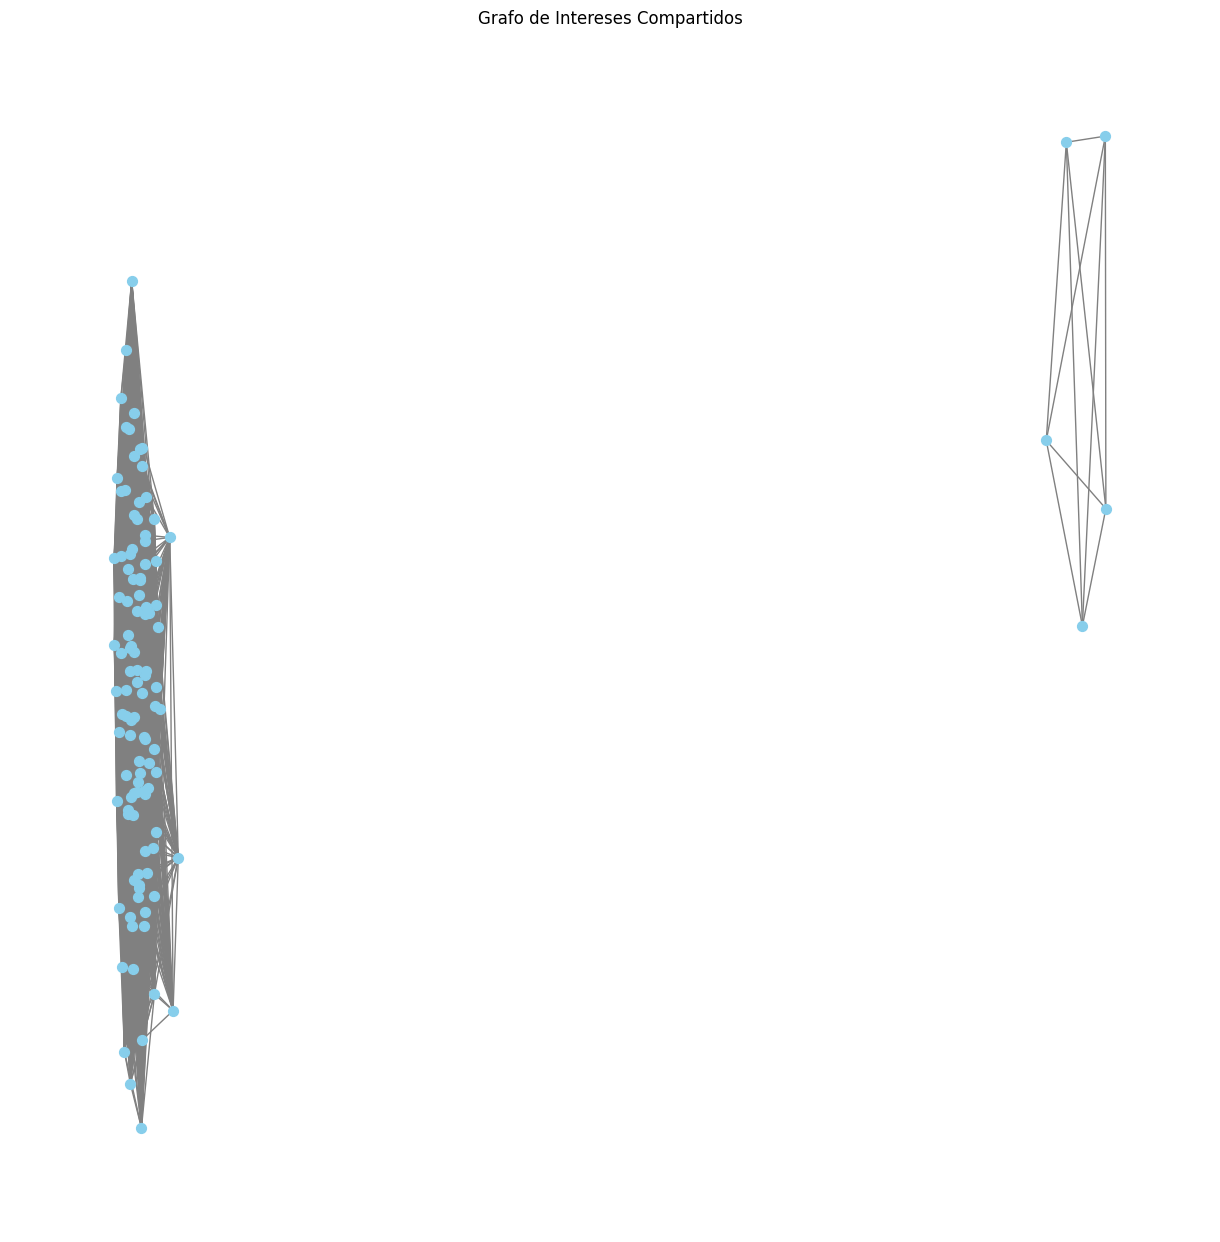

In [121]:
import matplotlib.pyplot as plt

# Dibujar el grafo
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)  # Posiciones de los nodos
nx.draw(G, pos, with_labels=False, node_color="skyblue", node_size=50, font_size=12, font_color="black", edge_color="gray")
plt.title("Grafo de Intereses Compartidos")
plt.show()


In [122]:
import networkx as nx
import plotly.graph_objects as go

# Función para visualizar el grafo de manera interactiva usando Plotly
def plot_interactive_graph(G, pos):
    edge_x = []
    edge_y = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines')

    node_x = []
    node_y = []
    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers',
        hoverinfo='text',
        marker=dict(
            showscale=True,
            size=10,
            colorbar=dict(
                thickness=15,
                title='Node Connections',
                xanchor='left',
                titleside='right'
            ),
            line_width=2))

    node_adjacencies = []
    node_text = []
    for node, adjacencies in enumerate(G.adjacency()):
        node_adjacencies.append(len(adjacencies[1]))
        node_text.append(f"# of connections: {len(adjacencies[1])}")

    node_trace.marker.color = node_adjacencies
    node_trace.text = node_text

    fig = go.Figure(data=[edge_trace, node_trace],
                    layout=go.Layout(
                        showlegend=False,
                        hovermode='closest',
                        margin=dict(b=0, l=0, r=0, t=0),
                        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                    )
    return fig

# Generar posiciones de los nodos usando el layout de Fruchterman-Reingold (también conocido como "spring layout")
pos = nx.spring_layout(G, seed=42)
# Visualizar el grafo de manera interactiva
plot_interactive_graph(G, pos).show()


In [125]:
# Función corregida para calcular la puntuación de compatibilidad
def calculate_compatibility(row_i, row_j, columns_to_compare):
    total_similarity = 0
    for col in columns_to_compare:
        # Si ambos son listas, usar Jaccard
        if isinstance(row_i[col], list) and isinstance(row_j[col], list):
            similarity = jaccard_similarity(row_i[col], row_j[col])
        # Si ambos son números (int o float), usar comparación directa
        elif isinstance(row_i[col], (int, float)) and isinstance(row_j[col], (int, float)):
            similarity = int(row_i[col] == row_j[col])
        # En caso contrario, usar comparación de objetos (esto dará 1 si son iguales, 0 en caso contrario)
        else:
            similarity = int(row_i[col] == row_j[col])
        total_similarity += similarity
    return total_similarity / len(columns_to_compare)

# Inicializar una matriz para almacenar las puntuaciones de compatibilidad
compatibility_matrix_corrected = np.zeros((len(df), len(df)))

# Calcular la puntuación de compatibilidad para cada par de usuarios
for i, row_i in df.iterrows():
    for j, row_j in df.iterrows():
        if i >= j:
            continue  # Evitar duplicados y auto-conexiones
        compatibility_matrix_corrected[i, j] = calculate_compatibility(row_i, row_j, columns_to_compare)
        compatibility_matrix_corrected[j, i] = compatibility_matrix_corrected[i, j]  # La matriz es simétrica

# Mostrar un fragmento de la matriz de compatibilidad para verificar
compatibility_matrix_corrected[:5, :5]


TypeError: cannot convert the series to <class 'int'>

In [124]:
#inprimir los tipos de datos de las columnas 
df.dtypes


CorreoElectronico             object
Edad                           int64
Genero                        object
Ubicacion                     object
EstadoCivil                    int64
ActividadesCitas              object
Hobbies                       object
FrecuenciaCitas               object
Organizacion                   int64
FlexibilidadHoraria            int64
InicioCitas                   object
DistanciaAceptable            object
PresupuestoGeneral            object
PresupuestoEspecial           object
DuracionCitas                 object
ImportanciaClima               int64
ActividadesClima              object
Cocina                        object
RestriccionesAlimentarias     object
Deportes                      object
InteresesCulturales           object
EntornoCitas                  object
FormalidadCitas               object
Vestimenta                    object
Disponibilidad                object
FlexibilidadHoraria          float64
dtype: object